In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [3]:
sns.set_theme(font_scale=1.7, style='whitegrid') 

In [98]:
uniform = np.loadtxt("Results/results.dat")
chiquad = np.loadtxt("Results/chiquad.dat")
chi = np.loadtxt("Results/chiquad_block.dat")
TLC_uni = np.loadtxt("Results/TLC_uniform.dat")
TLC_exp = np.loadtxt("Results/TLC_exponential.dat")
TLC_cau = np.loadtxt("Results/TLC_cauchy.dat")
buffon = np.loadtxt("Results/buffon.dat")

In [6]:
len(uniform.T[0]), len(uniform.T[3]), len(TLC_uni.T[3])

(100, 100, 10000)

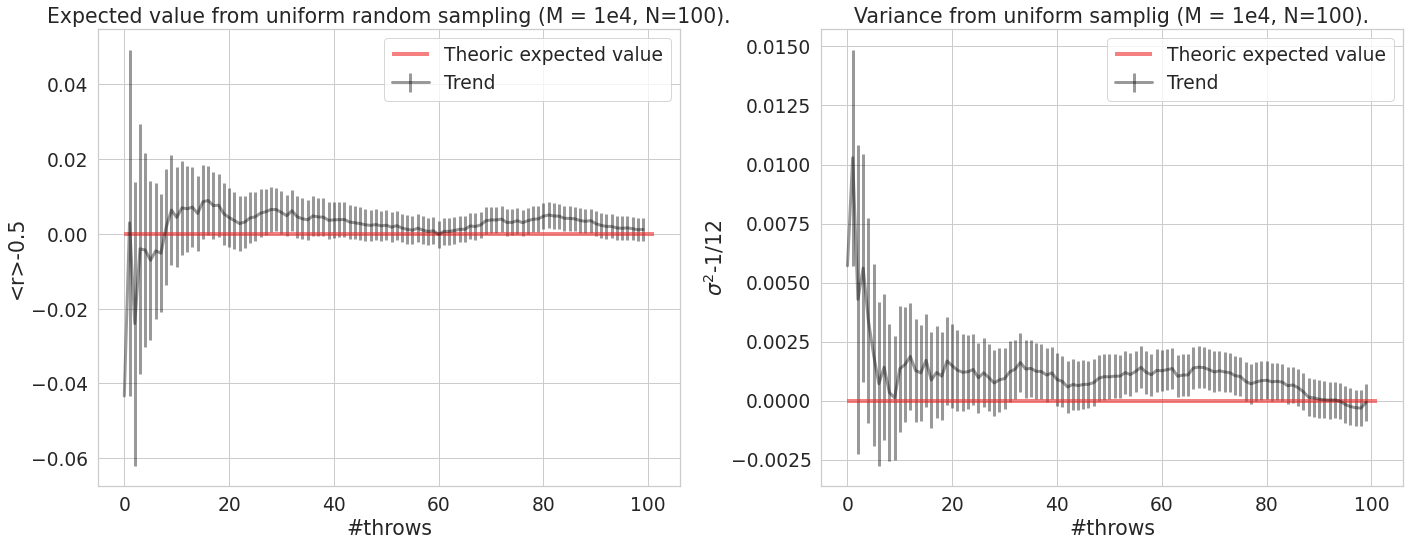

In [52]:
x = np.arange(100)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Expected value from uniform random sampling (M = 1e4, N=100).")
plt.errorbar(x, uniform.T[0]-0.5, yerr=uniform.T[1], color='black', alpha=0.4, label='Trend', linewidth=3)
plt.hlines(0,0,101, color='#EE2C2C', linestyle='-', label="Theoric expected value", linewidth=4, alpha=0.6)
plt.ylabel("<r>-0.5")
plt.xlabel("#throws")
plt.legend()

plt.subplot(1,2,2)
plt.title("Variance from uniform samplig (M = 1e4, N=100).")
plt.errorbar(x, uniform.T[2]-1/12, yerr=uniform.T[3], color='black', alpha=0.4, label='Trend', linewidth=3)
plt.hlines(0,0,101, color='#EE2C2C', linestyle='-', label="Theoric expected value", linewidth=4, alpha=0.6)
plt.ylabel("$\sigma^2$-1/12")
plt.xlabel("#throws")
plt.legend()

plt.tight_layout()

plt.show()

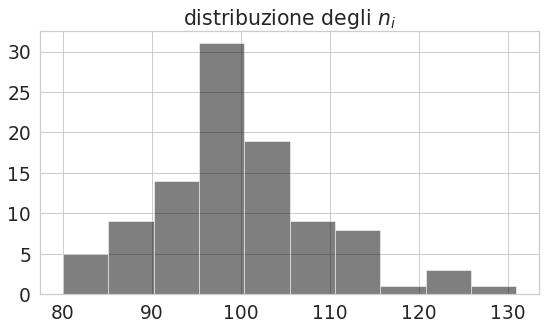

In [30]:
plt.figure(figsize=(8,5))

plt.title("distribuzione degli $n_i$")
plt.hist(chiquad, bins=10, color='black', alpha=0.5)
plt.tight_layout()

plt.show()

In [61]:
fit_uni = sc.norm.fit(TLC_uni.T[3])
fit_exp = sc.norm.fit(TLC_exp.T[3])
fit_cau = sc.cauchy.fit(TLC_cau.T[3])

y = np.linspace(-10, 10, 10000)

pdf_uni = sc.norm.pdf(y, fit_uni[0], fit_uni[1])
pdf_exp = sc.norm.pdf(y, fit_exp[0], fit_exp[1])
pdf_cau = sc.cauchy.pdf(y, fit_cau[0], fit_cau[1])

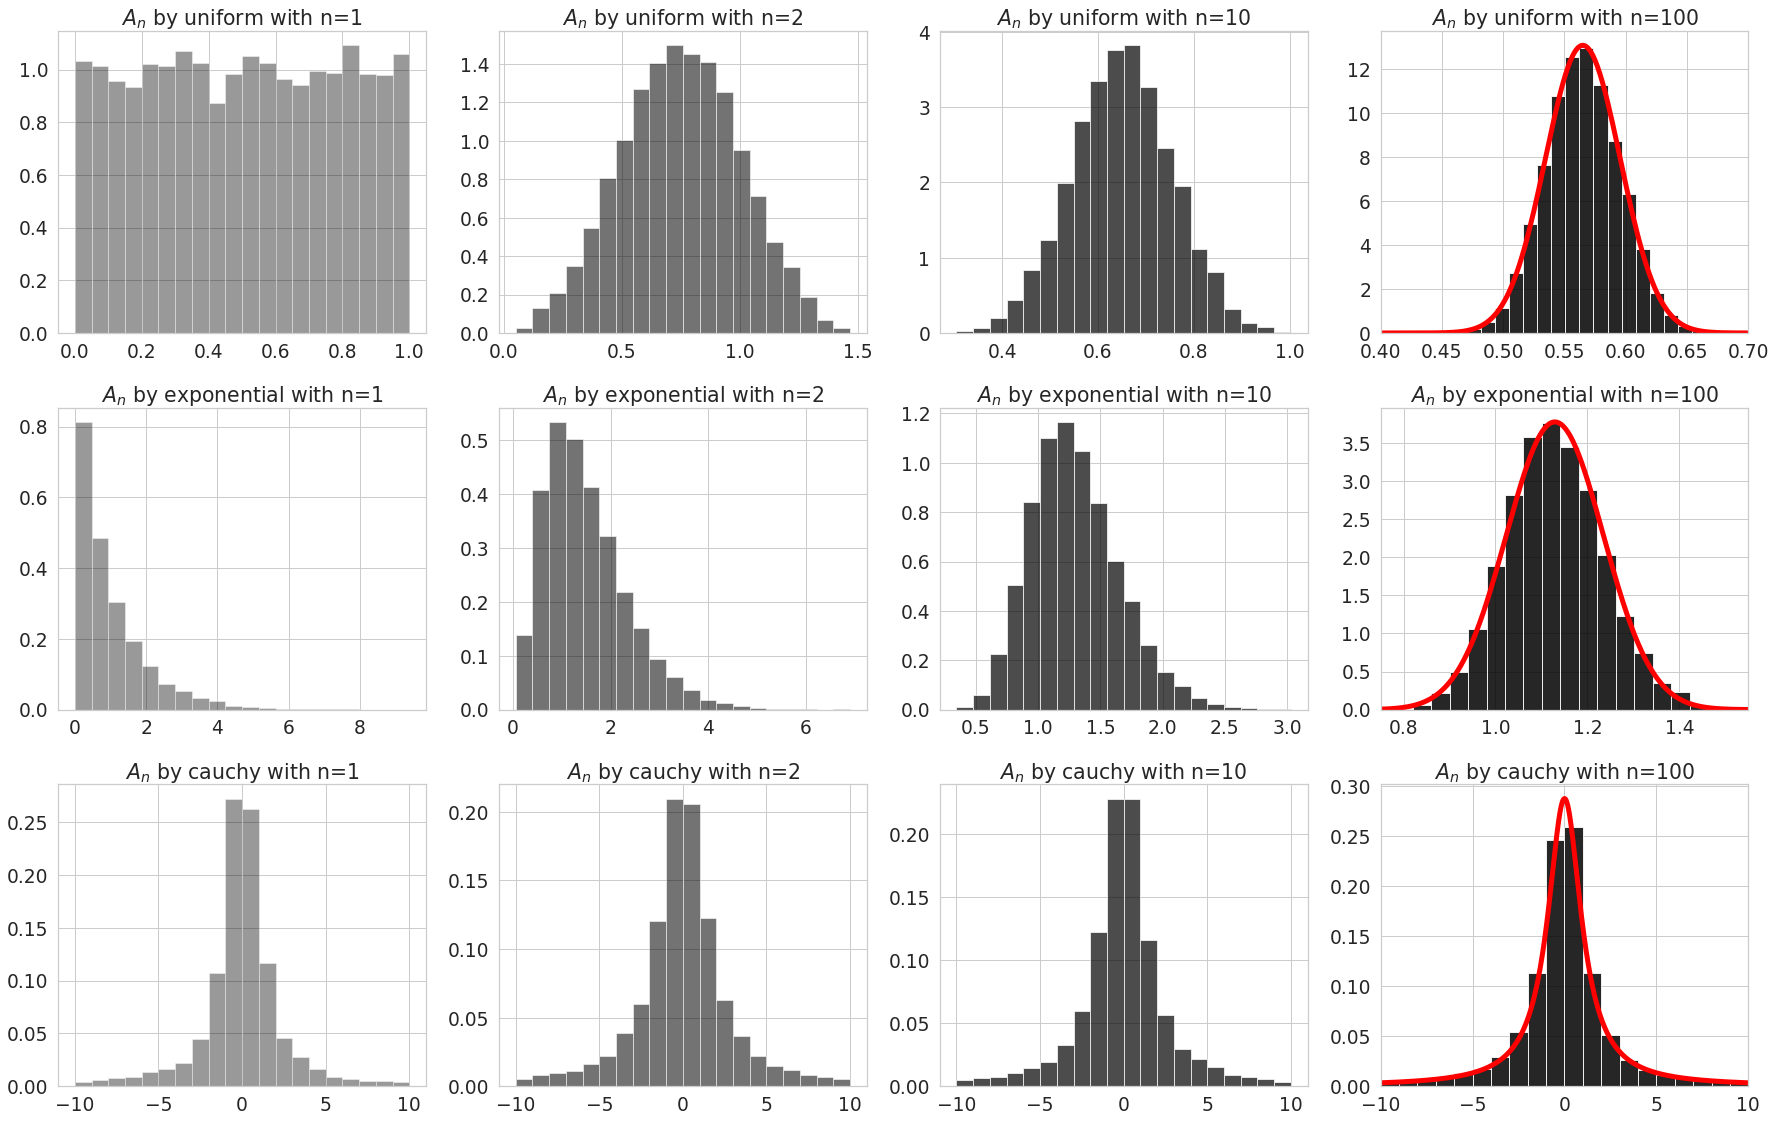

In [62]:
N = [1,2,10,100]

plt.figure(figsize=(25,16))
for i in range(12):
    plt.subplot(3,4,i+1)
    if(i<4):
        plt.title('$A_n$ by uniform with n='+str(N[i]))
        plt.hist(TLC_uni.T[i], bins=20, color='black', alpha=0.4+i*0.15, density=True)
        if(i==3):
            plt.plot(y, pdf_uni, color='red', linewidth=5)
            plt.xlim(0.4,0.7)
    elif(i<8):
        plt.title('$A_n$ by exponential with n='+str(N[i-4]))
        plt.hist(TLC_exp.T[i-4], bins=20, color='black', alpha=0.4+(i-4)*0.15, density=True)
        if(i==7):
            plt.plot(y, pdf_exp, color='red', linewidth=5)
            plt.xlim(0.75,1.55)
    elif(i<12):
        plt.title('$A_n$ by cauchy with n='+str(N[i-8]))
        plt.hist(TLC_cau.T[i-8], bins=20, color='black', alpha=0.4+(i-8)*0.15, range=(-10,10), density=True)
        if(i==11):
            plt.plot(y, pdf_cau, color='red', linewidth=5)
            plt.xlim(-10,10)
plt.tight_layout()
plt.savefig('TLC.png')
plt.show()    

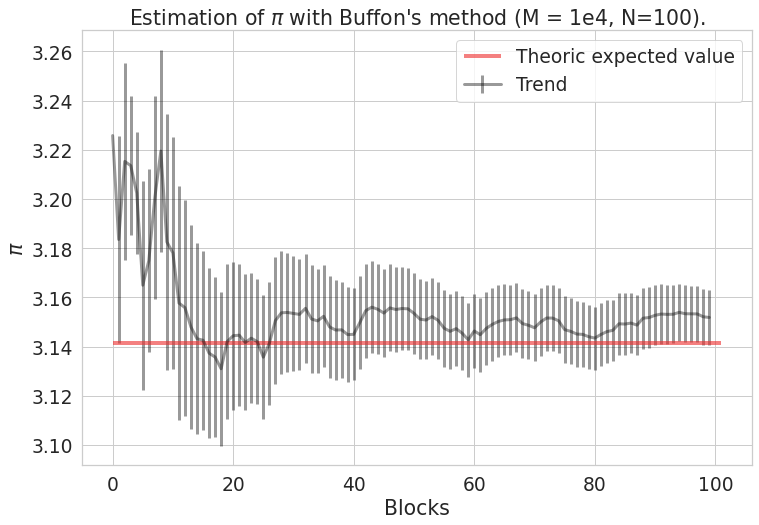

In [99]:
x = np.arange(100)

plt.figure(figsize=(12,8))

plt.title("Estimation of $\pi$ with Buffon's method (M = 1e4, N=100).")
plt.errorbar(x, buffon.T[0], yerr=buffon.T[1], color='black', alpha=0.4, label='Trend', linewidth=3)
plt.hlines(np.pi,0,101, color='#EE2C2C', linestyle='-', label="Theoric expected value", linewidth=4, alpha=0.6)
plt.ylabel("$\pi$")
plt.xlabel("Blocks")
plt.legend()